<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import FastICA
import statistics

In [ ]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [ ]:
# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xs = pd.DataFrame(scaled_x, columns = x.columns)

In [ ]:
#2 ICA components
comp = 2
ica = FastICA(n_components=comp, whiten=True)
ICx = ica.fit_transform(xs)
IC_Df = pd.DataFrame(data = ICx, columns = ['ic1', 'ic2'])
final2Df = pd.concat([IC_Df, df['quality']], axis = 1)
print(final2Df.head(5))
# make dataframes
x2ICA = final2Df.drop(['quality'], axis=1)
y2ICA = final2Df['quality'] 

#3 ICA components
comp = 3
ica = FastICA(n_components=comp, whiten=True)
ICx = ica.fit_transform(xs)
IC_Df = pd.DataFrame(data = ICx, columns = ['ic1', 'ic2', 'ic3'])
final3Df = pd.concat([IC_Df, df['quality']], axis = 1)
print(final3Df.head(5))
# make dataframes
x3ICA = final3Df.drop(['quality'], axis=1)
y3ICA = final3Df['quality'] 

#4 ICA components
comp = 4
ica = FastICA(n_components=comp, whiten=True)
ICx = ica.fit_transform(xs)
IC_Df = pd.DataFrame(data = ICx, columns = ['ic1', 'ic2', 'ic3', 'ic4'])
final4Df = pd.concat([IC_Df, df['quality']], axis = 1)
print(final4Df.head(5))
# make dataframes
x4ICA = final4Df.drop(['quality'], axis=1)
y4ICA = final4Df['quality'] 

        ic1       ic2  quality
0  0.022691  0.021033        6
1 -0.004591  0.000318        6
2  0.002069  0.003115        6
3  0.003934  0.012647        6
4  0.003934  0.012647        6
        ic1       ic2       ic3  quality
0 -0.016866 -0.002693  0.026711        6
1  0.002159 -0.004742 -0.001954        6
2 -0.005511  0.002552 -0.000253        6
3 -0.008954 -0.006785  0.007909        6
4 -0.008954 -0.006785  0.007909        6
        ic1       ic2       ic3       ic4  quality
0  0.013149 -0.011436 -0.004490 -0.029795        6
1 -0.001988 -0.000119 -0.004707  0.002236        6
2  0.004259 -0.006020  0.002362 -0.001214        6
3  0.008702 -0.000619 -0.006987 -0.008032        6
4  0.008702 -0.000619 -0.006987 -0.008032        6


cluster:  0
pred quality:  6.347093513058129 0.8840909206656379
cluster:  1
pred quality:  5.881386861313868 0.8853547170592092
cluster:  2
pred quality:  5.7534246575342465 0.8731689006908533
cluster:  3
pred quality:  5.645905420991927 0.7971462989886889
cluster:  4
pred quality:  5.531130876747141 0.7549558852687368
cluster:  5
pred quality:  5.595454545454546 0.8023807456177825
cluster:  6
pred quality:  5.591296928327645 0.7307046706341374
MAE:  0.6686346765599522    stdev:  0.8275320466739731


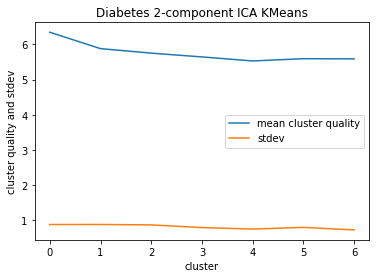

In [ ]:
# 2 component KMeans
# make dataframes
x2ICA = final2Df.drop(['quality'], axis=1)
y2ICA = final2Df['quality']

cstd = []
cquality = []
kmeans = KMeans(n_clusters=7, random_state=1, max_iter=5000) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x2ICA)
toc = time.perf_counter()

dfc = final2Df.drop(['ic1', 'ic2'], axis=1)
dfc['cluster']=labels
dfc['predquality']=labels

for i in range(0, 7):
  print('cluster: ', i)
  cluster = dfc.loc[dfc['cluster'] == i]
  #print(cluster)
  pred_quality = cluster['quality'].mean()
  cquality.append(pred_quality)
  qstd = cluster['quality'].std()
  cstd.append(qstd)
  print('pred quality: ',pred_quality, qstd)
  dfc['predquality'] = dfc['predquality'].replace(i,pred_quality)

MAE = mean_absolute_error(dfc['quality'], dfc['predquality'])
temp=dfc['quality'] - dfc['predquality']
#tstd = temp.std()
print('MAE: ',MAE, '   stdev: ', temp.std())

pyplot.plot([0, 1, 2, 3, 4, 5, 6], cquality , label='mean cluster quality')
pyplot.plot([0, 1, 2, 3, 4, 5, 6], cstd , label='stdev')
pyplot.title('Diabetes 2-component ICA KMeans')
pyplot.ylabel('cluster quality and stdev')
pyplot.xlabel('cluster')
pyplot.legend()
pyplot.show()

cluster:  0
pred quality:  5.599846977811783 0.745440438066051
cluster:  1
pred quality:  5.454545454545454 0.8007707326281138
cluster:  2
pred quality:  5.553323029366306 0.7253806041503289
cluster:  3
pred quality:  6.36 0.8818813765478429
cluster:  4
pred quality:  5.905292479108635 0.8602864531519958
cluster:  5
pred quality:  5.921259842519685 0.8850182800306422
cluster:  6
pred quality:  5.725931677018633 0.8446798090331789
MAE:  0.6636376819414603    stdev:  0.8224249374412976


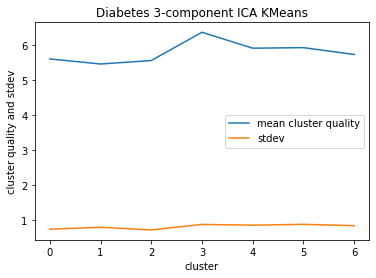

In [ ]:
# 3 component KMeans
# make dataframes
x3ICA = final3Df.drop(['quality'], axis=1)
y3ICA = final3Df['quality']

cstd = []
cquality = []
kmeans = KMeans(n_clusters=7, random_state=1, max_iter=5000) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x3ICA)
toc = time.perf_counter()

dfc = final3Df.drop(['ic1', 'ic2', 'ic3'], axis=1)
dfc['cluster']=labels
dfc['predquality']=labels

for i in range(0, 7):
  print('cluster: ', i)
  cluster = dfc.loc[dfc['cluster'] == i]
  #print(cluster)
  pred_quality = cluster['quality'].mean()
  cquality.append(pred_quality)
  qstd = cluster['quality'].std()
  cstd.append(qstd)
  print('pred quality: ',pred_quality, qstd)
  dfc['predquality'] = dfc['predquality'].replace(i,pred_quality)

MAE = mean_absolute_error(dfc['quality'], dfc['predquality'])
temp=dfc['quality'] - dfc['predquality']
#tstd = temp.std()
print('MAE: ',MAE, '   stdev: ', temp.std())

pyplot.plot([0, 1, 2, 3, 4, 5, 6], cquality , label='mean cluster quality')
pyplot.plot([0, 1, 2, 3, 4, 5, 6], cstd , label='stdev')
pyplot.title('Diabetes 3-component ICA KMeans')
pyplot.ylabel('cluster quality and stdev')
pyplot.xlabel('cluster')
pyplot.legend()
pyplot.show()

cluster:  0
pred quality:  6.274614869390489 0.8505667183270634
cluster:  1
pred quality:  5.603787327021122 0.756150825798209
cluster:  2
pred quality:  5.834905660377358 0.8594398585774455
cluster:  3
pred quality:  5.864963503649635 0.8342565939788569
cluster:  4
pred quality:  5.3899895724713245 0.7181976251013186
cluster:  5
pred quality:  5.8499580888516345 0.9341320927461798
cluster:  6
pred quality:  5.777181208053691 0.7973511932974326
MAE:  0.6614571865559309    stdev:  0.8228183212160388


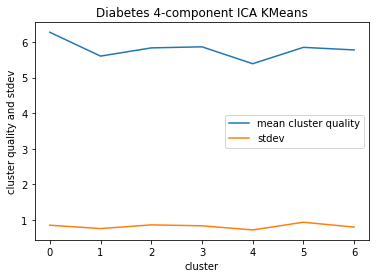

In [ ]:
# 4 component KMeans
# make dataframes
x4ICA = final4Df.drop(['quality'], axis=1)
y4ICA = final4Df['quality']

cstd = []
cquality = []
kmeans = KMeans(n_clusters=7, random_state=1, max_iter=5000) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x4ICA)
toc = time.perf_counter()

dfc = final4Df.drop(['ic1', 'ic2', 'ic3', 'ic4'], axis=1)
dfc['cluster']=labels
dfc['predquality']=labels

for i in range(0, 7):
  print('cluster: ', i)
  cluster = dfc.loc[dfc['cluster'] == i]
  #print(cluster)
  pred_quality = cluster['quality'].mean()
  cquality.append(pred_quality)
  qstd = cluster['quality'].std()
  cstd.append(qstd)
  print('pred quality: ',pred_quality, qstd)
  dfc['predquality'] = dfc['predquality'].replace(i,pred_quality)

MAE = mean_absolute_error(dfc['quality'], dfc['predquality'])
temp=dfc['quality'] - dfc['predquality']
#tstd = temp.std()
print('MAE: ',MAE, '   stdev: ', temp.std())

pyplot.plot([0, 1, 2, 3, 4, 5, 6], cquality , label='mean cluster quality')
pyplot.plot([0, 1, 2, 3, 4, 5, 6], cstd , label='stdev')
pyplot.title('Diabetes 4-component ICA KMeans')
pyplot.ylabel('cluster quality and stdev')
pyplot.xlabel('cluster')
pyplot.legend()
pyplot.show()

In [ ]:
# EM 2 components
gmm = GaussianMixture(n_components=7, max_iter=5000, covariance_type='full', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x2ICA)
toc = time.perf_counter()

predquality = np.zeros_like(gmm_y)

for i in range(7):
    cat = (gmm_y == i)
    predquality[cat] = statistics.mean(y[cat])  
acc = accuracy_score(y2ICA, predquality)
print("Accuracy using GMM = ", acc)
print('MAE: ', mean_absolute_error(y2ICA, predquality))
print('time: ', (toc-tic))

Accuracy using GMM =  0.42052313883299797
MAE:  0.7096424702058505
time:  0.2669423080001252


In [ ]:
# EM 3 components
gmm = GaussianMixture(n_components=7, max_iter=5000, covariance_type='full', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x3ICA)
toc = time.perf_counter()

predquality = np.zeros_like(gmm_y)

for i in range(7):
    cat = (gmm_y == i)
    predquality[cat] = statistics.mean(y[cat])  
acc = accuracy_score(y3ICA, predquality)
print("Accuracy using GMM = ", acc)
print('MAE: ', mean_absolute_error(y3ICA, predquality))
print('time: ', (toc-tic))

Accuracy using GMM =  0.409534127843987
MAE:  0.7323943661971831
time:  0.16060403700021197


In [ ]:
# EM 4 components
gmm = GaussianMixture(n_components=7, max_iter=5000, covariance_type='full', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x4ICA)
toc = time.perf_counter()

predquality = np.zeros_like(gmm_y)

for i in range(7):
    cat = (gmm_y == i)
    predquality[cat] = statistics.mean(y[cat])  
acc = accuracy_score(y4ICA, predquality)
print("Accuracy using GMM = ", acc)
print('MAE: ', mean_absolute_error(y4ICA, predquality))
print('time: ', (toc-tic))

Accuracy using GMM =  0.4442036836403034
MAE:  0.6723417427642779
time:  0.24001894999992146
